In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 1.99M/1.99M [00:00<00:00, 94.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2


In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('/content/twitter_training.csv')

In [ ]:
df2.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [ ]:
import pandas as pd

# Define column names
column_names = ["column_1", "column_2","Sentiment","Sentence"]  # Replace with actual column names

# Load the CSV file without header and assign column names
df2 = pd.read_csv("/content/twitter_training.csv", header=None, names=column_names)

print(df2.head())  # Check if columns are correct


   column_1     column_2 Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                            Sentence  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
df2.shape

(74682, 4)

In [ ]:
############################################################

# **Missing Values**

In [ ]:
df2.isnull().sum()

column_1       0
column_2       0
Sentiment      0
Sentence     686
dtype: int64

In [ ]:
df2['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [ ]:
df2['Sentence']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Sentence, Length: 74682, dtype: object

In [ ]:
df2 = df2[df2['Sentiment'] != 'Irrelevant']

In [ ]:
print(df2['Sentiment'].value_counts())  # Should no longer show "Irrelevant"

Sentiment
Negative    22542
Positive    20832
Neutral     18318
Name: count, dtype: int64


In [ ]:
df2.isnull().sum()

column_1       0
column_2       0
Sentiment      0
Sentence     571
dtype: int64

In [ ]:
df2 = df2.dropna(subset=['Sentence'])

In [ ]:
print(df2.isnull().sum())  # Check for remaining missing values

column_1     0
column_2     0
Sentiment    0
Sentence     0
dtype: int64


In [ ]:
df2.shape

(61121, 4)

In [ ]:
df2.to_csv('df2_clear_twitter.csv')

In [ ]:
###############################################################################

In [ ]:
df2_clear=pd.read_csv('/content/df2_clear_twitter.csv')

In [ ]:
df2_clear.head()

Unnamed: 0  column_1     column_2 Sentiment  \
0           0      2401  Borderlands  Positive   
1           1      2401  Borderlands  Positive   
2           2      2401  Borderlands  Positive   
3           3      2401  Borderlands  Positive   
4           4      2401  Borderlands  Positive   

                                            Sentence  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [ ]:
df2.nunique()

column_1     10282
column_2        32
Sentiment        3
Sentence     57297
dtype: int64

# **Text Classification**

In [ ]:
# Step 1: Uninstall NLTK and delete its data entirely
!pip uninstall -y nltk
!rm -rf /root/nltk_data
!rm -rf /usr/local/nltk_data

# Step 2: Reinstall a stable version of NLTK
!pip install nltk==3.8.1  # Pin to a stable version

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load dataset
df2 = pd.read_csv('/content/df2_clear_twitter.csv')

# Get stopwords list
stop_words = set(stopwords.words('english'))

# Define function for preprocessing with POS tagging
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove stopwords & punctuation

    pos_tags = pos_tag(words)  # Get POS tags

    # Keep only Nouns (NN), Verbs (VB), Adjectives (JJ), and Adverbs (RB)
    filtered_words = [word for word, tag in pos_tags if tag.startswith(('NN', 'VB', 'JJ', 'RB'))]

    return ' '.join(filtered_words)  # Return cleaned text

# Apply preprocessing function to 'Sentence' column
df2['Cleaned_Review'] = df2['Sentence'].astype(str).apply(preprocess_text)

# Display processed dataframe
print(df2.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


   Unnamed: 0  column_1     column_2 Sentiment  \
0           0      2401  Borderlands  Positive   
1           1      2401  Borderlands  Positive   
2           2      2401  Borderlands  Positive   
3           3      2401  Borderlands  Positive   
4           4      2401  Borderlands  Positive   

                                            Sentence  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Review  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


In [ ]:
df2.head()

Unnamed: 0  column_1     column_2 Sentiment  \
0           0      2401  Borderlands  Positive   
1           1      2401  Borderlands  Positive   
2           2      2401  Borderlands  Positive   
3           3      2401  Borderlands  Positive   
4           4      2401  Borderlands  Positive   

                                            Sentence  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Review  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder

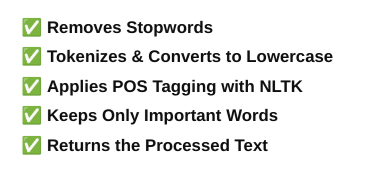

In [ ]:
df2.to_csv('df2_twitter_preprocessed.csv')

In [ ]:
##############################################################################

In [ ]:
df2_pre=pd.read_csv('/content/df2_twitter_preprocessed.csv')

In [ ]:
df2_pre.head()

Unnamed: 0.1  Unnamed: 0  column_1     column_2 Sentiment  \
0             0           0      2401  Borderlands  Positive   
1             1           1      2401  Borderlands  Positive   
2             2           2      2401  Borderlands  Positive   
3             3           3      2401  Borderlands  Positive   
4             4           4      2401  Borderlands  Positive   

                                            Sentence  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Review  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder

# **1 ) Feature Extraction**

# **Vectorization - BERT**

In [ ]:
df2_pre.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
column_1             0
column_2             0
Sentiment            0
Sentence             0
Cleaned_Review    1536
dtype: int64

In [ ]:
df2_pre = df2_pre.dropna(subset=['Cleaned_Review'])

In [ ]:
df2_pre.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
column_1          0
column_2          0
Sentiment         0
Sentence          0
Cleaned_Review    0
dtype: int64

In [ ]:
print(df2_pre['Cleaned_Review'].apply(type).value_counts())

Cleaned_Review
<class 'str'>    59585
Name: count, dtype: int64


In [ ]:
from transformers import BertTokenizer, BertModel
import torch  # Required for tensor operations

# 3. BERT Embeddings
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    return list(last_hidden_state.mean(dim=1).detach().numpy()[0])

df2_pre['BERT_Embedding'] = df2_pre['Cleaned_Review'].apply(get_bert_embedding)

In [ ]:
df2_pre

Unnamed: 0.1  Unnamed: 0  column_1     column_2 Sentiment  \
0                 0           0      2401  Borderlands  Positive   
1                 1           1      2401  Borderlands  Positive   
2                 2           2      2401  Borderlands  Positive   
3                 3           3      2401  Borderlands  Positive   
4                 4           4      2401  Borderlands  Positive   
...             ...         ...       ...          ...       ...   
61116         61116       74677      9200       Nvidia  Positive   
61117         61117       74678      9200       Nvidia  Positive   
61118         61118       74679      9200       Nvidia  Positive   
61119         61119       74680      9200       Nvidia  Positive   
61120         61120       74681      9200       Nvidia  Positive   

                                                Sentence  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
61116  Just realized that the Windows partition of my...   
61117  Just realized that my Mac window partition is ...   
61118  Just realized the windows partition of my Mac ...   
61119  Just realized between the windows partition of...   
61120  Just like the windows partition of my Mac is l...   

                                          Cleaned_Review  \
0                          im getting borderlands murder   
1                                    coming borders kill   
2                            im getting borderlands kill   
3                           im coming borderlands murder   
4                          im getting borderlands murder   
...                                                  ...   
61116  realized windows partition mac years nvidia dr...   
61117  realized mac window partition years nvidia dri...   
61118  realized windows partition mac years nvidia dr...   
61119  realized windows partition mac years nvidia dr...   
61120    windows partition mac years drivers idea notice   

                                          BERT_Embedding  
0      [0.20229957, -0.11369792, 0.39551067, -0.01954...  
1      [0.3408045, -0.08364203, -0.020582985, 0.09118...  
2      [0.12905084, -0.1902146, 0.3261264, -0.0198617...  
3      [0.11887888, -0.010340976, 0.5494281, -0.09218...  
4      [0.20229957, -0.11369792, 0.39551067, -0.01954...  
...                                                  ...  
61116  [-0.387785, -0.12202826, 0.49094146, -0.104739...  
61117  [-0.25529215, -0.053816404, 0.43843043, -0.087...  
61118  [-0.387785, -0.12202826, 0.49094146, -0.104739...  
61119  [-0.019281212, 0.23741972, 0.66409314, 0.01912...  
61120  [-0.23523518, -0.031295463, 0.34815374, -0.047...  

[59585 rows x 8 columns]

In [ ]:
df2_pre.to_csv('twitter_bert_embedding.csv')

In [ ]:
df2_bert=pd.read_csv('/content/twitter_bert_embedding.csv')

In [ ]:
df2_bert.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  column_1     column_2 Sentiment  \
0             0             0           0      2401  Borderlands  Positive   
1             1             1           1      2401  Borderlands  Positive   
2             2             2           2      2401  Borderlands  Positive   
3             3             3           3      2401  Borderlands  Positive   
4             4             4           4      2401  Borderlands  Positive   

                                            Sentence  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Review  \
0  im getting borderlands murder   
1            coming borders kill   
2    im getting borderlands kill   
3   im coming borderlands murder   
4  im getting borderlands murder   

                                      BERT_Embedding  
0  [np.float32(0.20229957), np.float32(-0.1136979...  
1  [np.float32(0.3408045), np.float32(-0.08364203...  
2  [np.float32(0.12905084), np.float32(-0.1902146...  
3  [np.float32(0.11887888), np.float32(-0.0103409...  
4  [np.float32(0.20229957), np.float32(-0.1136979...

In [ ]:
df2_bert.shape

(59585, 9)

In [ ]:
import numpy as np
import re

def extract_floats(embedding_str):
    # Extract all float numbers from the string
    float_values = re.findall(r"-?\d+\.\d+", embedding_str)
    return np.array(float_values, dtype=np.float32)  # Convert to NumPy array

# Apply transformation only if the column is in string format
df2_bert['BERT_Embedding'] = df2_bert['BERT_Embedding'].apply(lambda x: extract_floats(x) if isinstance(x, str) else np.array(x, dtype=np.float32))

print(df2_bert['BERT_Embedding'].head())  # Verify conversion


0    [0.20229957, -0.11369792, 0.39551067, -0.01954...
1    [0.3408045, -0.08364203, -0.020582985, 0.09118...
2    [0.12905084, -0.1902146, 0.3261264, -0.0198617...
3    [0.11887888, -0.010340976, 0.5494281, -0.09218...
4    [0.20229957, -0.11369792, 0.39551067, -0.01954...
Name: BERT_Embedding, dtype: object


In [ ]:
import numpy as np
embeddings_array = np.stack(df2_bert['BERT_Embedding'].values)
print(embeddings_array.shape)  # (num_samples, embedding_dim)


(59585, 768)


In [ ]:
#######################################################################

# **Use SVD to Reduce to 50D**

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import joblib

# Make sure embeddings are all proper lists
bert_df = pd.DataFrame(df2_bert['BERT_Embedding'].tolist(), index=df2_bert.index)

# Apply SVD
svd = TruncatedSVD(n_components=50)
bert_reduced = svd.fit_transform(bert_df)

# Add reduced embeddings back to the DataFrame
df2_bert['BERT_Embedding'] = list(bert_reduced)

# Save the SVD model
joblib.dump(svd, 'twitter_real_svd_model.pkl')
print("SVD model saved successfully!")


SVD model saved successfully!


In [ ]:
import numpy as np
embeddings_array = np.stack(df2_bert['BERT_Embedding'].values)
print(embeddings_array.shape)  # (num_samples, embedding_dim)

(59585, 50)


In [ ]:
df2_bert.to_csv('df2_bert_svd-50D.csv')

In [ ]:
df2_svd=pd.read_csv('/content/df2_bert_svd-50D.csv')

In [ ]:
df2_bert['BERT_Embedding']

0        [-5.554886, -1.819894, 0.5064906, -0.7853918, ...
1        [-5.549612, -3.4117684, -0.062972456, -1.15259...
2        [-5.762743, -1.9045929, 0.51536417, -0.3489056...
3        [-5.7294645, -1.9562511, 0.5109223, -0.8102832...
4        [-5.554886, -1.819894, 0.5064906, -0.7853918, ...
                               ...                        
59580    [-6.8103065, 0.71711874, -1.9463587, -0.000686...
59581    [-6.5052156, 0.789784, -2.2989082, -0.6019069,...
59582    [-6.810306, 0.7171186, -1.9463589, -0.00068622...
59583    [-6.959989, 1.0523582, -0.7067301, 0.26246852,...
59584    [-6.714486, -0.067498, -2.6666522, -0.9584125,...
Name: BERT_Embedding, Length: 59585, dtype: object

In [ ]:
print(df2_bert['BERT_Embedding'].dtype)  # Check data type
print(df2_bert['BERT_Embedding'].iloc[0])  # Inspect the first row

object
[-5.5548859e+00 -1.8198940e+00  5.0649059e-01 -7.8539181e-01
  4.6617353e-01 -3.0169958e-01 -4.2895412e-01 -2.3148698e-01
  4.2453995e-01  3.8952893e-01  5.4605657e-01 -2.9523316e-01
 -3.0411294e-01  3.0860978e-01 -6.4861113e-01 -5.7338023e-01
  1.0317008e+00 -5.8545899e-01  4.5708302e-01 -3.0512393e-01
  5.0695896e-01 -5.2303708e-01 -5.7385457e-01 -7.9525393e-01
 -3.9934093e-01  2.2154985e-01 -6.1850101e-01  5.7615167e-01
 -1.4323318e-01  2.2578627e-02 -3.8158482e-01  7.8426492e-01
  3.3592805e-03  2.0836334e-01 -4.4404042e-01  2.0759439e-01
 -3.5259080e-01  1.7114232e-01 -1.9267359e-01  4.3996865e-01
  2.8727388e-01 -4.4300443e-01  5.6378925e-01  3.2159045e-02
 -2.8057790e-01  2.2536144e-01 -4.5820083e-03  4.2081207e-01
  6.7168377e-02  3.2753371e-02]


In [ ]:
import numpy as np
embeddings_array = np.stack(df2_bert['BERT_Embedding'].values)
print(embeddings_array.shape)  # (num_samples, embedding_dim)

(59585, 50)


In [ ]:
feature = df2_bert['BERT_Embedding']
target = df2_bert['Sentiment']

# **Model Training**

# **1) Random Forest Algorithm**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Convert the embeddings into a 2D numpy array
X = np.array([np.array(embedding, dtype=np.float32) for embedding in feature])  # Ensure proper shape
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_train = rf_classifier.predict(X_train)  # Train predictions
y_pred_test = rf_classifier.predict(X_test)    # Test predictions

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Overfitting check
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


Train Accuracy: 0.99
Test Accuracy: 0.75

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      4424
           1       0.77      0.62      0.69      3497
           2       0.74      0.77      0.75      3996

    accuracy                           0.75     11917
   macro avg       0.75      0.74      0.74     11917
weighted avg       0.75      0.75      0.74     11917


🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


# **2) XG Boosting Algorithm**

In [ ]:
df2_bert.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  column_1     column_2 Sentiment  \
0             0             0           0      2401  Borderlands  Positive   
1             1             1           1      2401  Borderlands  Positive   
2             2             2           2      2401  Borderlands  Positive   
3             3             3           3      2401  Borderlands  Positive   
4             4             4           4      2401  Borderlands  Positive   

                                            Sentence  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Review  \
0  im getting borderlands murder   
1            coming borders kill   
2    im getting borderlands kill   
3   im coming borderlands murder   
4  im getting borderlands murder   

                                      BERT_Embedding  
0  [-5.554886, -1.819894, 0.5064906, -0.7853918, ...  
1  [-5.549612, -3.4117684, -0.062972456, -1.15259...  
2  [-5.762743, -1.9045929, 0.51536417, -0.3489056...  
3  [-5.7294645, -1.9562511, 0.5109223, -0.8102832...  
4  [-5.554886, -1.819894, 0.5064906, -0.7853918, ...

In [ ]:
df2_bert['Sentiment'].value_counts()

Sentiment
Negative    21895
Positive    20125
Neutral     17565
Name: count, dtype: int64

In [ ]:
sentiment_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

df2_bert['Sentiment'] = df2_bert['Sentiment'].map(sentiment_mapping)
print(df2_bert['Sentiment'].head())  # To check if mapping worked


0    2
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64


Train Accuracy: 0.75
Test Accuracy: 0.66

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      4424
           1       0.64      0.51      0.57      3497
           2       0.66      0.69      0.68      3996

    accuracy                           0.66     11917
   macro avg       0.66      0.65      0.65     11917
weighted avg       0.66      0.66      0.66     11917



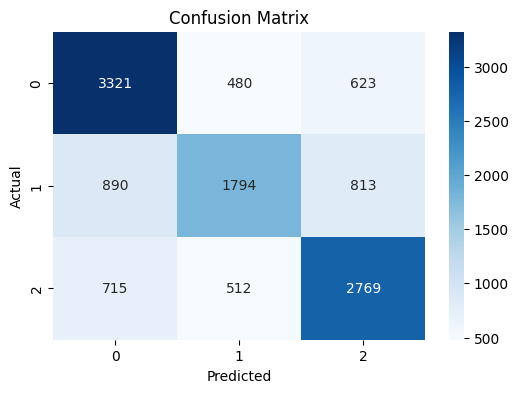


For class '0':
True Positives (TP): 3321
False Positives (FP): 1605
False Negatives (FN): 1103
True Negatives (TN): 5888

For class '1':
True Positives (TP): 1794
False Positives (FP): 992
False Negatives (FN): 1703
True Negatives (TN): 7428

For class '2':
True Positives (TP): 2769
False Positives (FP): 1436
False Negatives (FN): 1227
True Negatives (TN): 6485

✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Convert the embeddings into a 2D numpy array
X = np.array([np.array(embedding, dtype=np.float32) for embedding in feature])  # Stacks the list of embeddings into a proper 2D array
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")

# **FNN ( FeedForward Neural Network )**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),  # 50 components from SVD
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 sentiment classes: Positive, Neutral, Negative
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5082 - loss: 1.0034 - val_accuracy: 0.6078 - val_loss: 0.8639
Epoch 2/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5969 - loss: 0.8830 - val_accuracy: 0.6248 - val_loss: 0.8426
Epoch 3/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6118 - loss: 0.8532 - val_accuracy: 0.6260 - val_loss: 0.8222
Epoch 4/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6217 - loss: 0.8379 - val_accuracy: 0.6411 - val_loss: 0.8109
Epoch 5/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6282 - loss: 0.8250 - val_accuracy: 0.6468 - val_loss: 0.8040
Epoch 6/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6362 - loss: 0.8086 - val_accuracy: 0.6485 - val_loss: 0.7905
Epoch 7/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6459 - loss: 0.7955 - val_accuracy: 0.6513 - val_loss: 0.7831
Epoch 8/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6496 - loss: 0.7880 